In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("Iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
df.shape

(150, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
df.duplicated().sum()

0

# EDA

In [8]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [9]:
import matplotlib.pyplot as plt

In [10]:
df["Species"].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [11]:
labels_list = df["Species"].unique()
print(labels_list)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


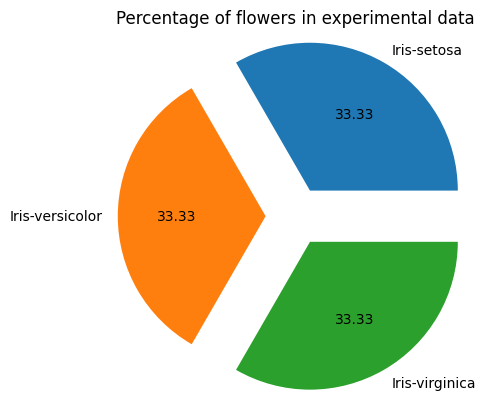

In [12]:
plt.pie(df["Species"].value_counts(), labels=labels_list, autopct = "%0.2f", explode = [0.2, 0.2, 0.2])
plt.title("Percentage of flowers in experimental data")
plt.show()

In [13]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df["Species"] = encoder.fit_transform(df["Species"])
df.sample(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
144,145,6.7,3.3,5.7,2.5,2
31,32,5.4,3.4,1.5,0.4,0
124,125,6.7,3.3,5.7,2.1,2
135,136,7.7,3.0,6.1,2.3,2
6,7,4.6,3.4,1.4,0.3,0
63,64,6.1,2.9,4.7,1.4,1
39,40,5.1,3.4,1.5,0.2,0
49,50,5.0,3.3,1.4,0.2,0
51,52,6.4,3.2,4.5,1.5,1
116,117,6.5,3.0,5.5,1.8,2


In [14]:
import seaborn as sns

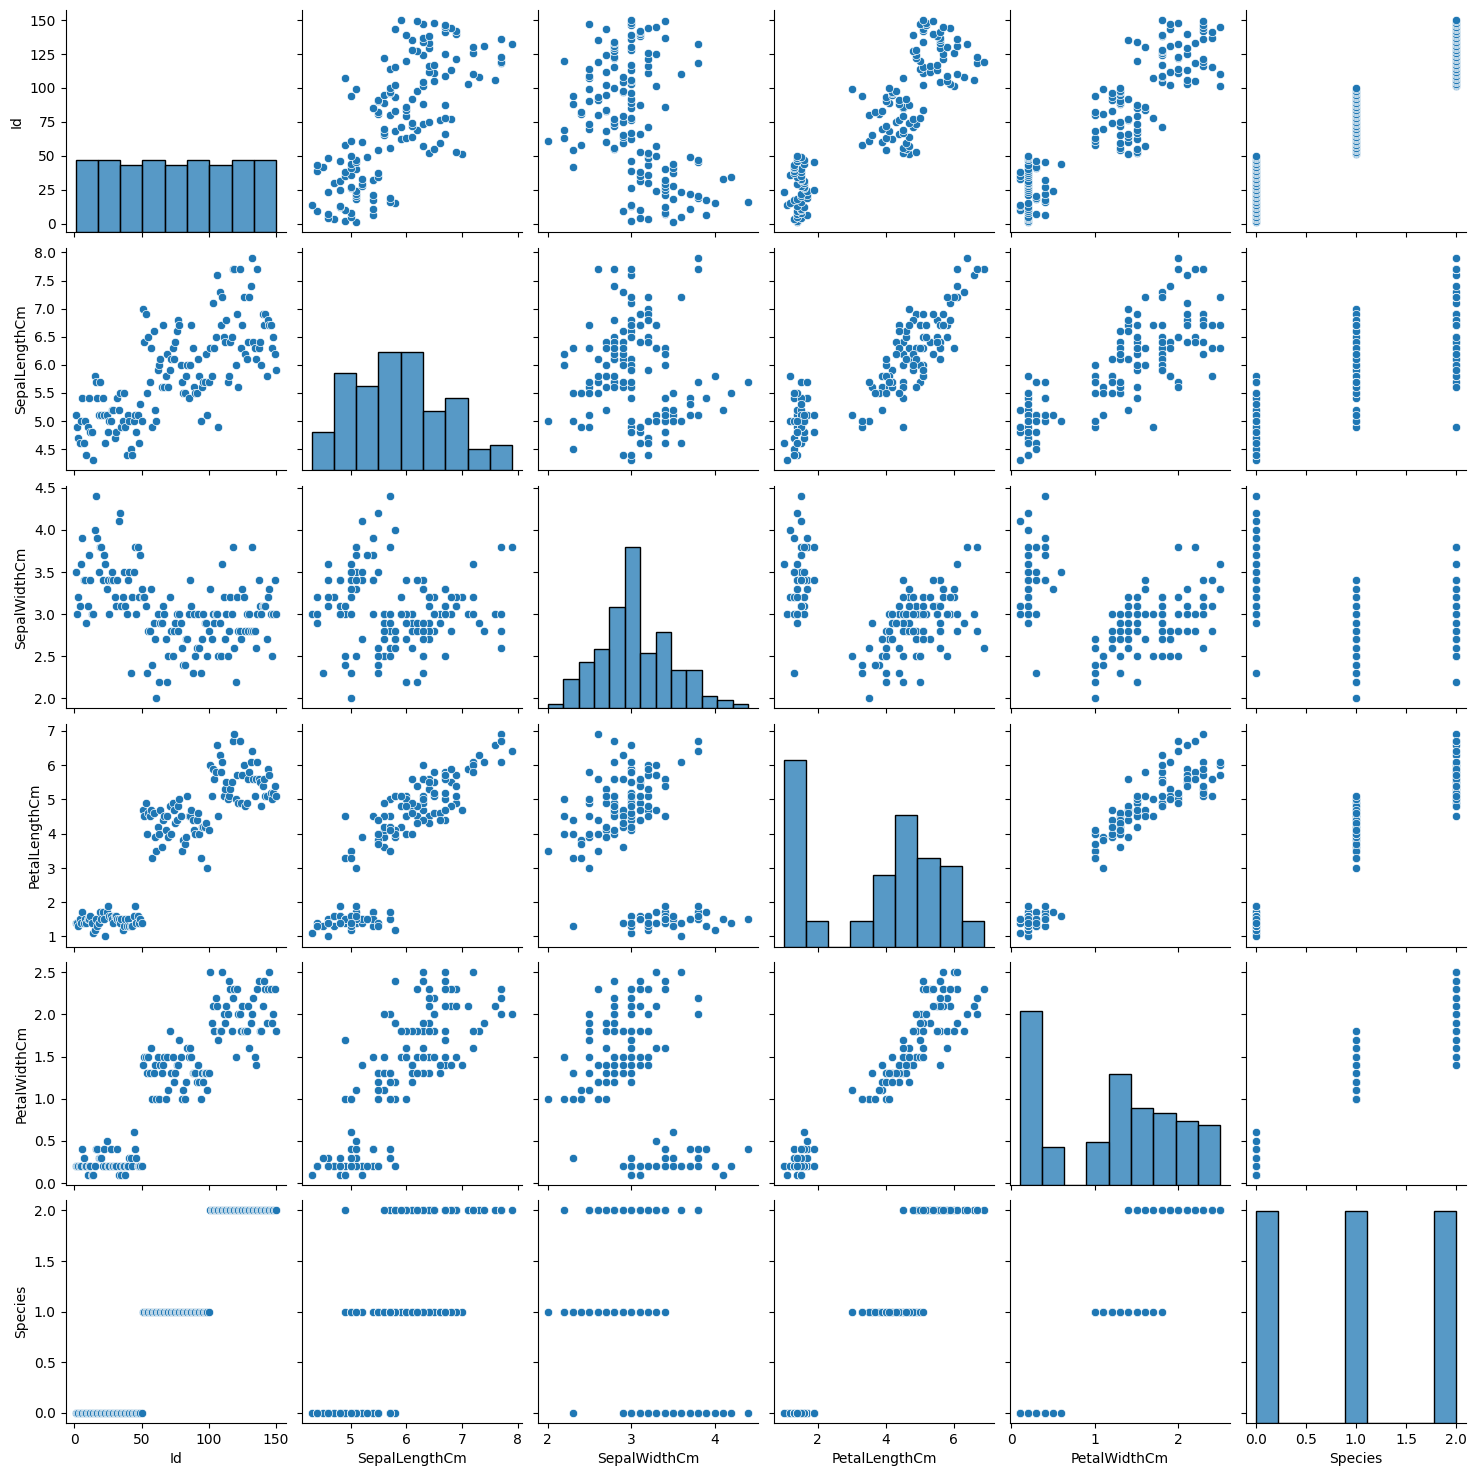

In [15]:
sns.pairplot(df)

In [16]:
df.drop(columns = ["Id"]).corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.782561,-0.419446,0.949043,0.956464,1.000000


<Axes: >

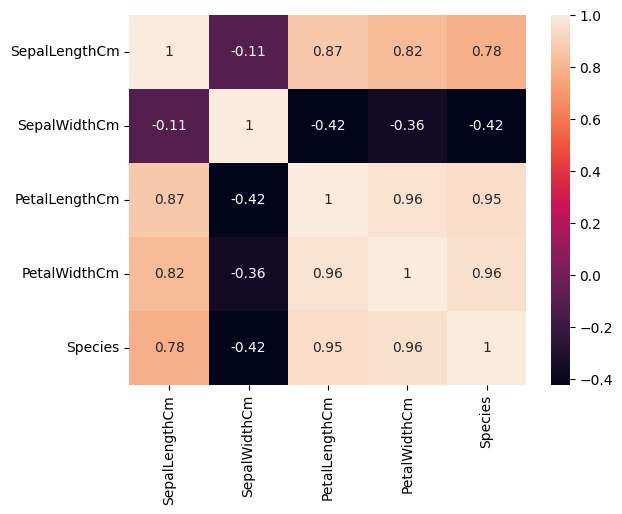

In [17]:
sns.heatmap(df.drop(columns = ["Id"]).corr(), annot = True)

# preprocessing and extracting test/train data

In [18]:
X = df.drop(columns=["Species", "Id"])
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [19]:
y = df["Species"]
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int32

In [20]:
mean_val = np.mean(X, 0)
std_dev = np.mean(X, 0)
print("Mean value of data:", mean_val, "\n","standard deviation of data:", std_dev)

Mean value of data: SepalLengthCm    5.843333
SepalWidthCm     3.054000
PetalLengthCm    3.758667
PetalWidthCm     1.198667
dtype: float64 
 standard deviation of data: SepalLengthCm    5.843333
SepalWidthCm     3.054000
PetalLengthCm    3.758667
PetalWidthCm     1.198667
dtype: float64


Mean and standard deviations of data for different flowers

In [21]:
df0 = df[df["Species"] == 0]
df1 = df[df["Species"] == 1]
df2 = df[df["Species"] == 2]

mean_val0 = np.mean(df0.drop(columns=["Species", "Id"]), 0)
std_dev0 = np.mean(df0.drop(columns=["Species", "Id"]), 0)

mean_val1= np.mean(df1.drop(columns=["Species", "Id"]), 0)
std_dev1= np.mean(df1.drop(columns=["Species", "Id"]), 0)

mean_val2= np.mean(df2.drop(columns=["Species", "Id"]), 0)
std_dev2= np.mean(df2.drop(columns=["Species", "Id"]), 0)

print("Mean value and standard deviation for Iris-setosa:", [mean_val0, std_dev0])
print("Mean value and standard deviation for Iris-versicolor:", [mean_val1, std_dev1])
print("Mean value and standard deviation for Iris-virginica:", [mean_val2, std_dev2])

Mean value and standard deviation for Iris-setosa: [SepalLengthCm    5.006
SepalWidthCm     3.418
PetalLengthCm    1.464
PetalWidthCm     0.244
dtype: float64, SepalLengthCm    5.006
SepalWidthCm     3.418
PetalLengthCm    1.464
PetalWidthCm     0.244
dtype: float64]
Mean value and standard deviation for Iris-versicolor: [SepalLengthCm    5.936
SepalWidthCm     2.770
PetalLengthCm    4.260
PetalWidthCm     1.326
dtype: float64, SepalLengthCm    5.936
SepalWidthCm     2.770
PetalLengthCm    4.260
PetalWidthCm     1.326
dtype: float64]
Mean value and standard deviation for Iris-virginica: [SepalLengthCm    6.588
SepalWidthCm     2.974
PetalLengthCm    5.552
PetalWidthCm     2.026
dtype: float64, SepalLengthCm    6.588
SepalWidthCm     2.974
PetalLengthCm    5.552
PetalWidthCm     2.026
dtype: float64]


In [22]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 1)
#80% data is used for traing and rest for testing the accuracy of the model

# Model bulding using Logistic regression as it suits the dataset as seen in EDA 

In [23]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(train_X, train_y)

C:\Users\Arnab Sadhu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Evaluation of model

In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [25]:
predicted_y = model.predict(test_X)
predicted_y

array([2, 0, 1, 0, 0, 0, 2, 2, 2, 1, 0, 1, 2, 1, 2, 0, 2, 1, 1, 2, 1, 1,
       0, 0, 2, 1, 0, 0, 1, 1])

In [26]:
model_accuracy_score = accuracy_score(predicted_y, test_y)
confusion_mat_model = confusion_matrix(predicted_y, test_y)
print(model_accuracy_score, "\n\n", confusion_mat_model)

0.9666666666666667 

 [[10  0  0]
 [ 0 10  1]
 [ 0  0  9]]


In [27]:
#Model is 96.67% accuarte which is very good

<Axes: >

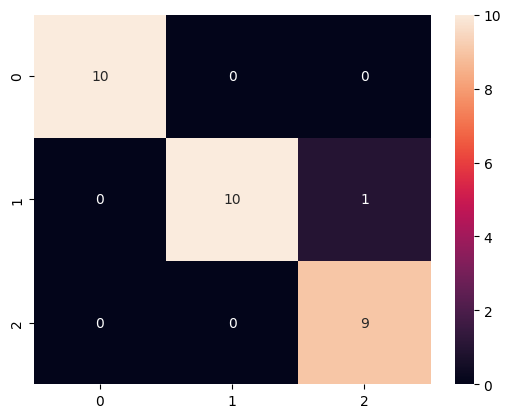

In [28]:
sns.heatmap(confusion_mat_model, annot=True)